# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [405]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(mouse_metadata, study_results, on= 'Mouse ID', how= 'right')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [406]:
# Checking the number of mice.
len(merged_df['Mouse ID'].value_counts())

249

In [407]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse = merged_df.loc[merged_df.duplicated(subset= ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouse

array(['g989'], dtype=object)

In [408]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = merged_df.loc[merged_df['Mouse ID'] == "g989", :]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [409]:
# Create a clean DataFrame by dropping the duplicate mouse by its I
merged_index = merged_df.set_index(['Mouse ID'])

#merged_index.drop(merged_index[(merged_index[] == 'g989')].index, inplace= True)
cleaned_df = merged_index.drop(index= ('g989'))                                  
#cleaned_df = merged_index.drop(merged_index['g989'], axis= 0, inplace= True)
cleaned_df = cleaned_df.reset_index()
cleaned_df
#= merged_index.loc(['Mouse ID'] == 'g989')

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1875,r944,Capomulin,Male,12,25,45,41.581521,2
1876,u364,Capomulin,Male,18,17,45,31.023923,3
1877,p438,Ceftamin,Female,11,26,45,61.433892,1
1878,x773,Placebo,Female,21,30,45,58.634971,4


In [410]:
# Checking the number of mice in the clean DataFrame
#reset = cleaned_df.reset_index(inplace = True)
#cleaned_df['Mouse ID'] = cleaned_df.index

len(cleaned_df['Mouse ID'].unique())
#cleaned_df.reset_index()
#print(reset)

248

In [411]:
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1875,r944,Capomulin,Male,12,25,45,41.581521,2
1876,u364,Capomulin,Male,18,17,45,31.023923,3
1877,p438,Ceftamin,Female,11,26,45,61.433892,1
1878,x773,Placebo,Female,21,30,45,58.634971,4


## Summary Statistics

In [412]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
variance = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
stdev = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
SEM = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

summary_statistics = pd.DataFrame({'Mean Tumor Volume': mean,
                                  'Median Tumor Volume': median,
                                  'Tumor Volume Variance': variance,
                                  'Tumor Volume Std. Dev.': stdev,
                                  'Tumor Volum Std. Err.': SEM})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volum Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [413]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
sum_stat_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
sum_stat_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [414]:
sum_stat_data = cleaned_df['Drug Regimen'].value_counts()
sum_stat_data


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

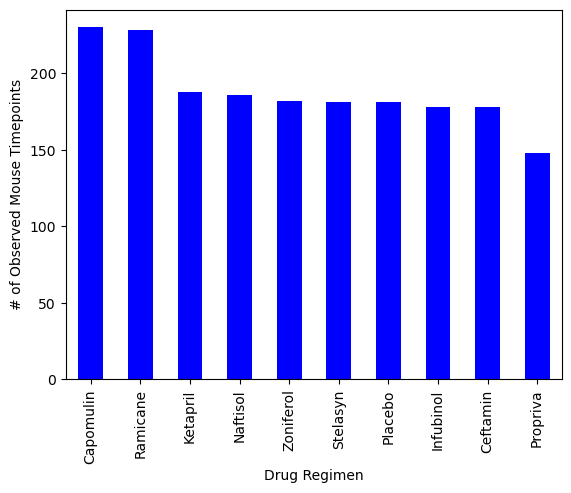

In [415]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
sum_stat_data.plot.bar(color= 'blue', xlabel= 'Drug Regimen', ylabel= '# of Observed Mouse Timepoints')


In [416]:
new_df = sum_stat_data.rename_axis('Drug Regimen').reset_index(name= 'counts')
new_df
x_axis = new_df['Drug Regimen']
y_axis = new_df['counts']

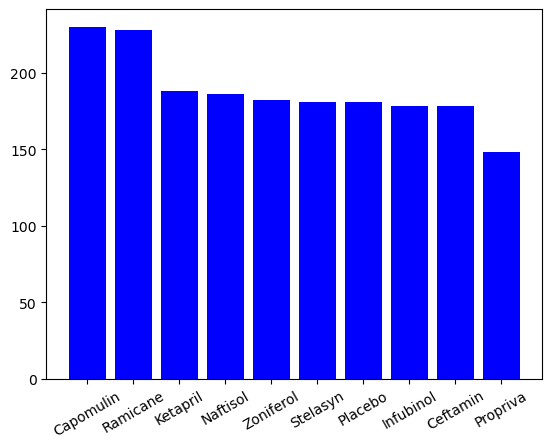

In [417]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(x_axis, y_axis, color= 'blue')
plt.xticks(rotation= 30)
plt.show()

In [418]:
cleaned_df['Sex'].value_counts()



Male      958
Female    922
Name: Sex, dtype: int64

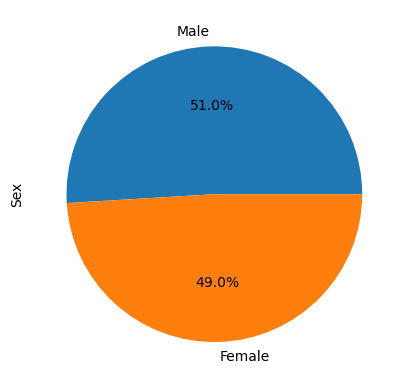

In [419]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
cleaned_df["Sex"].value_counts().plot.pie(autopct= "%1.1f%%")
plt.show()

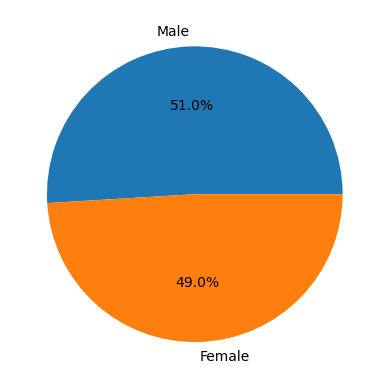

In [420]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
amount = [958, 922]
plt.pie(amount, labels= labels, autopct= '%1.1f%%')
plt.show()

In [402]:
#cleaned_data_df = cleaned_df({'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Tumor Volume (mm3)', 
                     #         'Metastatic Sites'})
#cleaned_data_df
#cleaned_two = cleaned_df.rename(columns= {'Mouse ID': 'Mouse ID 2'}, inplace= True)
#cleaned_two

## Quartiles, Outliers and Boxplots

In [456]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin",:]
#ramicane_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ramicane", :]
#infubinol_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Infubinol", :]
#ceftamin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
#capomulin_last = capomulin_df.groupby('Mouse ID').max()['Tumor Volume (mm3)']
#capomulin_last = pd.DataFrame(capomulin_last)
#capomulin_last

#ramicane_last = ramicane_df.groupby('Mouse ID').max()['Tumor Volume (mm3)']
#ramicane_last = pd.DataFrame(ramicane_last)

#infubinol_last = infubinol_df.groupby('Mouse ID').max()['Tumor Volume (mm3)']
#infubinol_last = pd.DataFrame(infubinol_last)

#ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Tumor Volume (mm3)']
#ceftamin_last = pd.DataFrame(ceftamin_last)

#treatments_merged = [capomulin_last, ramicane_last, infubinol_last, ceftamin_last]
#capomulin_vol = pd.DataFrame(capomulin_last)
#capomulin_vol
#final_df = (lambda  left,right: pd.merge(left,right,on=['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)' ],
#                                            how='inner'), capomulin_last )
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_df,on=['Mouse ID','Timepoint'],how="left")
#treatments_merged = pd.merge(capomulin_last, ramicane_last, on= ('Mouse ID', 'Timepoint'),
 #                   infubinol_last, on= ('Mouse ID', 'Timepoint'), ceftamin_last, on= ('Mouse ID', 'Timepoint'), how= 'left')
#final_df
#treatments_merged

In [452]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#cap_tumor = merged_capo['Tumor Volume (mm3)']
#rami_tumor = merged_rami['Tumor Volume (mm3)']
#infub_tumor = merged_infub['Tumor Volume (mm3)']
#ceft_tumor = merged_ceft['Tumor Volume (mm3)']
#Tumors = [cap_tumor, rami_tumor, infub_tumor, ceft_tumor]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Treatments = merged_df[merged_df['Drug Regimen'].isin(Treatments_list)]
#last_tp = Treatments.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#last_tp = last_tp.stack(level=0).unstack(level=0)
for Treatment in Treatments_list:
    print(Treatment)

#merged_capo['Drug Regimen'].quantile([.25, .5, .75])
#for x in Treatments:
 #   quartiles = for x in Tumors ([.25, .5, .75])
 #   lower_quart = quartiles[.025]
  #  upper_quart = quartiles[.75]
  #  iqr = upper_quart - lower_quart
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

#final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == Treatment, 'Tumor Volume (mm3)']
    # add subset 

    
    # Determine outliers using upper and lower bounds
   

Capomulin
Ramicane
Infubinol
Ceftamin


In [458]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Treatment in Treatments_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == Treatment, 'Tumor Volume (mm3)']
    #final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == Treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    Tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{Treatment}'s potential outliers: {outliers}")
    #outliers = # refer to module 05-Data-Visualization - class 3 - Activities 03-Stu_Summary_Stats_Python
    #print() # refer to module 05-Data-Visualization - class 3 - Activities 03-Stu_Summary_Stats_Python
    #print(f'{Treatment}: IQR - {iqr}. Upper Quartile - {upper_q}. Lower Quartile - {lower_q}. Potential outliers are above {upper_bound} and below {lower_bound}')

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [423]:
#regimen = 0
for Treatment in Treatments_list:
    quartiles = last_tp[Treatment].quantile([.25,.5,.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = (upper_q - lower_q)
    lower_bound = (lower_q - (1.5*iqr))
    upper_bound = (upper_q + (1.5*iqr))
    
    print(f'{Treatment}: IQR - {iqr}. Upper Quartile - {upper_q}. Lower Quartile - {lower_q}. Potential outliers are above {upper_bound} and below {lower_bound}')
#regimen == 0



Capomulin: IQR - 7.781863460000004. Upper Quartile - 40.1592203. Lower Quartile - 32.37735684. Potential outliers are above 51.83201549 and below 20.70456164999999
Ramicane: IQR - 9.098536719999998. Upper Quartile - 40.65900627. Lower Quartile - 31.56046955. Potential outliers are above 54.30681135 and below 17.912664470000003
Infubinol: IQR - 11.477135160000003. Upper Quartile - 65.52574285. Lower Quartile - 54.04860769. Potential outliers are above 82.74144559000001 and below 36.83290494999999
Ceftamin: IQR - 15.577752179999997. Upper Quartile - 64.29983003. Lower Quartile - 48.72207785. Potential outliers are above 87.66645829999999 and below 25.355449580000002


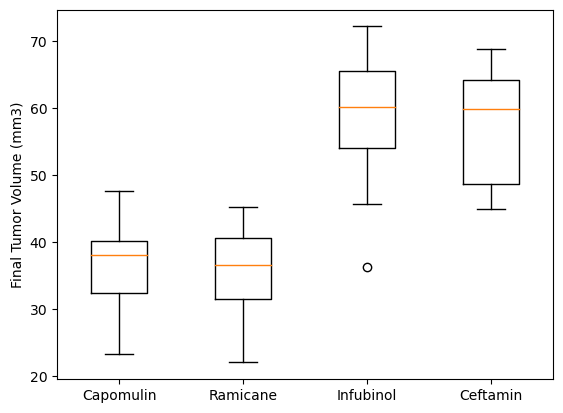

In [459]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(Tumor_vol_data, labels = Treatments_list)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

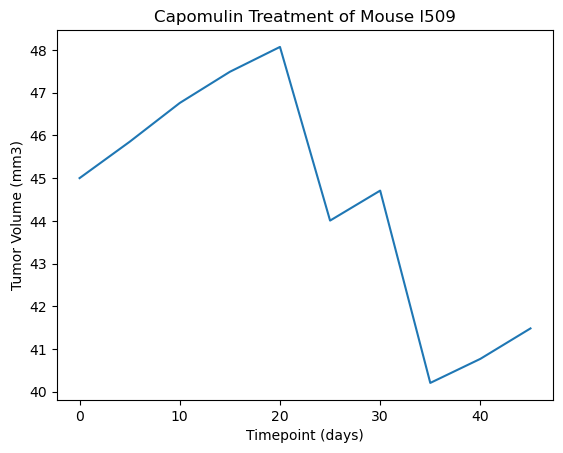

In [425]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capo_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509", :]
x_axis = capo_mouse['Timepoint']
Tumor_vol = capo_mouse['Tumor Volume (mm3)']

capo_mouse.head()

plt.plot(x_axis, Tumor_vol,)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment of Mouse l509')

C:\Users\Adwoa\AppData\Local\Temp\ipykernel_21768\3296098776.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()


Text(0, 0.5, 'Averag Tumor Volume (mm3)')

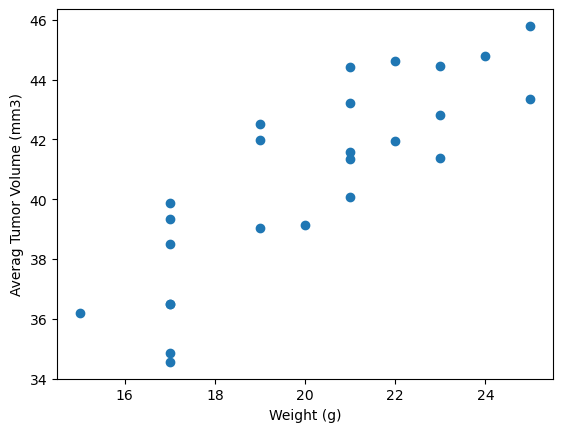

In [426]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tum_vol['Weight (g)'], avg_tum_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is PearsonRResult(statistic=0.841936342469472, pvalue=1.3225722434712483e-07)


C:\Users\Adwoa\AppData\Local\Temp\ipykernel_21768\1924185571.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()


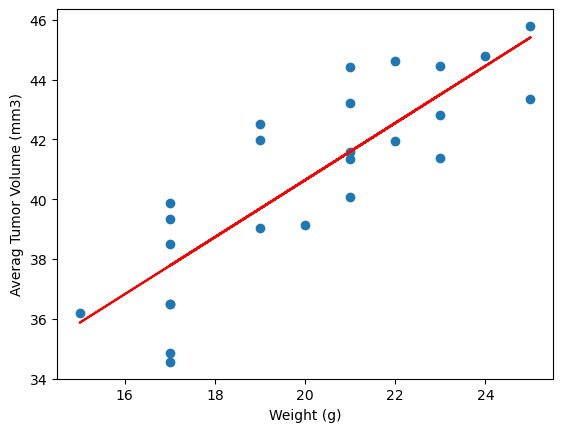

In [427]:
# Calculate the correlation coefficient and a linear regression model 
#for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(avg_tum_vol['Weight (g)'],avg_tum_vol['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {correlation}')

avg_tum_vol = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(avg_tum_vol['Weight (g)'], avg_tum_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')


(slope, intercept,rvalue, pvalue, stderr)= st.linregress(avg_tum_vol["Weight (g)"],avg_tum_vol["Tumor Volume (mm3)"])
regress_values=avg_tum_vol["Weight (g)"]* slope + intercept
#line_eq= (f"y = {round(slope, 2)} x + {round(intercept, 2)}")

plt.plot(avg_tum_vol["Weight (g)"], regress_values, color = 'red')
